In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.patches import Ellipse
import sep

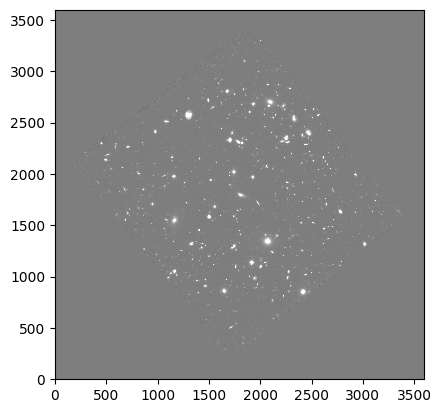

In [2]:
# insert the fits
file = fits.open('Ignacio.fits')
data = file[0].data

# Convert the byte order of the array to native
data = data.byteswap().newbyteorder()

# Measure the background and subtract it from the data
bkg = sep.Background(data)
data_sub = data - bkg

# Detect sources in the subtracted data
# Use a detection threshold of 1.5 times the global root mean square (rms) error
objects = sep.extract(data_sub, 20 , err=bkg.globalrms)

# Plot the original image with detected sources highlighted
fig, ax = plt.subplots()

# Normalize the image data for display
m, s = np.mean(data), np.std(data)
im = ax.imshow(data, interpolation='nearest', cmap='gray', vmin=m - s, vmax=m + s, origin='lower')

In [3]:
# insert fits 
file = fits.open('Ignacio.fits')
data = file[0].data

# Convert the byte order of the array to native
data = data.byteswap().newbyteorder()

# Measure the background and subtract it from the data
bkg = sep.Background(data)
data_sub = data - bkg

# Detect sources in the subtracted data
# Use a detection threshold of 1.5 times the global root mean square (rms) error
objects = sep.extract(data_sub, 20 , err=bkg.globalrms)



In [4]:
bkg = sep.Background(data)
print (bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [5]:
bkg_image = bkg. back()

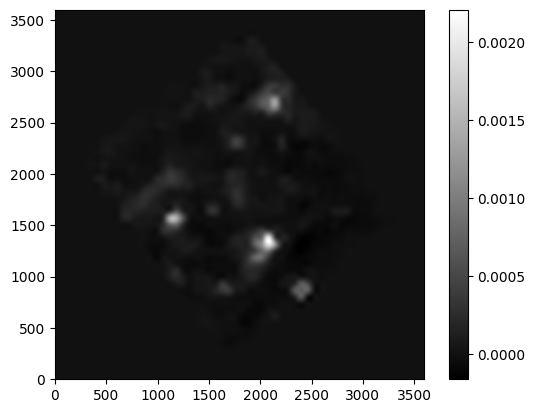

In [6]:
plt. imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('image2.png')
plt. colorbar();

In [7]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

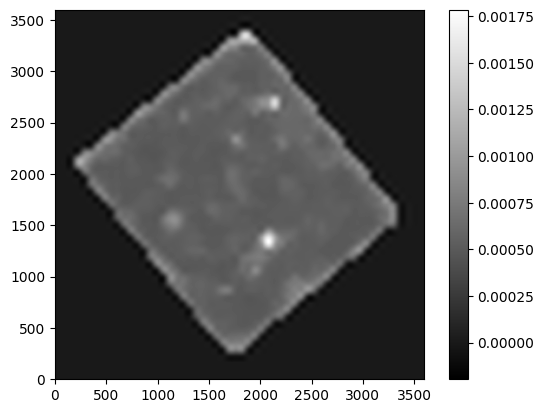

In [8]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('image3.png')
plt.colorbar();

In [9]:
len(objects)

939

NameError: name 'save' is not defined

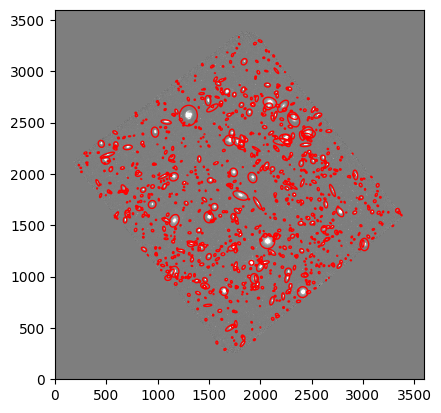

In [10]:
# Plot the original image with detected sources highlighted
fig, ax = plt.subplots()

# Normalize the image data for display
m, s = np.mean(data), np.std(data)
im = ax.imshow(data, interpolation='nearest', cmap='gray', vmin=m - s, vmax=m + s, origin='lower')

# Plot ellipses around the detected sources
for i in range(len(objects)):
    ellipse = Ellipse(
        xy=(objects['x'][i], objects['y'][i]),
        width=12 * objects['a'][i],
        height=12 * objects['b'][i],
        angle=objects['theta'][i] * 180. / np.pi
    )
    ellipse.set_facecolor('none')
    ellipse.set_edgecolor('red')
    ax.add_artist(ellipse)

# Show the plot
save.file('image4.png')
plt.show()